In [ ]:
# try to find the highest probobility of prediction for branchynet easy data.

# Then use this data for training. 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict,cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic, WhiteKernel, Matern
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
import joblib
import matplotlib.pylab as pylab
import matplotlib as mpl
from sklearn.linear_model import RandomizedLasso
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

#pandas
import pandas as pd
import math
from math import sqrt
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import sys
from time import time
from enum import Enum

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow import keras

In [46]:
#https://www.kaggle.com/aakashnain/kmnist-mnist-replacement
# Let us define some paths first
input_path = "datasets/data/kmnist/"

# Path to training images and corresponding labels provided as numpy arrays
kmnist_train_images_path = input_path+"kmnist-train-imgs.npz"
kmnist_train_labels_path = input_path+"kmnist-train-labels.npz"

# Path to the test images and corresponding labels
kmnist_test_images_path = input_path+"kmnist-test-imgs.npz"
kmnist_test_labels_path = input_path+"kmnist-test-labels.npz"

# Load the training data from the corresponding npz files
kmnist_train_images = np.load(kmnist_train_images_path)['arr_0']
kmnist_train_labels = np.load(kmnist_train_labels_path)['arr_0']

# Load the test data from the corresponding npz files
kmnist_test_images = np.load(kmnist_test_images_path)['arr_0']
kmnist_test_labels = np.load(kmnist_test_labels_path)['arr_0']

print("Number of training samples: {} where each sample is of size: {}".format(
    len(kmnist_train_images), kmnist_train_images.shape[1:] ))
print("Number of test samples: {} where each sample is of size: {}".format(
    len(kmnist_test_images), kmnist_test_images.shape[1:]))
#np.savetxt('Kmist_X_test_or.txt',kmnist_test_images)
#np.savetxt('Kmist_Y_test_or.txt',kmnist_test_labels)
X_train = kmnist_train_images.reshape(60000, 1, 28, 28)
X_test = kmnist_test_images.reshape(10000, 1, 28, 28)
Y_train = kmnist_train_labels
Y_test = kmnist_test_labels
print("x_train shape:", X_train.shape, "y_train shape:", Y_train.shape)
print("x_train shape:", X_test.shape, "y_train shape:", Y_test.shape)
np.savetxt("Kmist_X_test_or.txt", X_test.reshape(10000,784))
np.savetxt("Kmist_Y_test_or.txt", Y_test.reshape(10000,))

x_check = np.loadtxt("Kmist_X_test_or.txt")
y_check = np.loadtxt("Kmist_Y_test_or.txt")
print(x_check.shape)
print(y_check.shape)


Number of training samples: 60000 where each sample is of size: (28, 28)
Number of test samples: 10000 where each sample is of size: (28, 28)
('x_train shape:', (60000, 1, 28, 28), 'y_train shape:', (60000,))
('x_train shape:', (10000, 1, 28, 28), 'y_train shape:', (10000,))
(10000, 784)
(10000,)


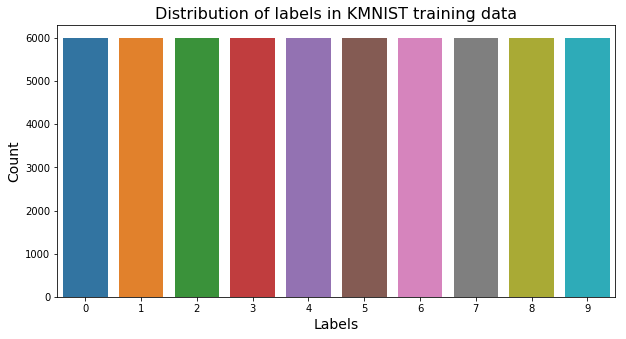

In [47]:
#!pip install seaborn
import seaborn as sns

# Get the unique labels
labels = np.unique(kmnist_train_labels)

# Get the frequency count for each label
frequency_count = np.bincount(kmnist_train_labels)

# Visualize 
plt.figure(figsize=(10,5))
sns.barplot(x=labels, y=frequency_count);
plt.title("Distribution of labels in KMNIST training data", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

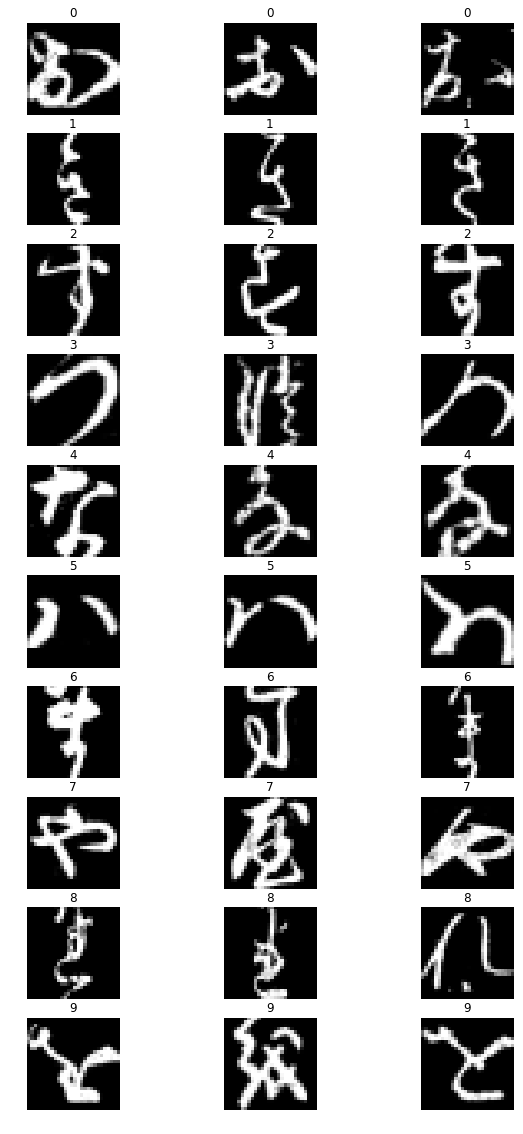

In [24]:
# Let's see how the images for different labels look like
random_samples = []
for i in range(10):
    samples = kmnist_train_images[np.where(kmnist_train_labels==i)][:3]
    random_samples.append(samples)

# Converting list into a numpy array
random_samples = np.array(random_samples)

# Visualize the samples
f, ax = plt.subplots(10,3, figsize=(10,20))
for i, j in enumerate(random_samples):
    ax[i, 0].imshow(random_samples[i][0,:,:], cmap='gray')
    ax[i, 1].imshow(random_samples[i][1,:,:], cmap='gray')
    ax[i, 2].imshow(random_samples[i][2,:,:], cmap='gray')
    
    ax[i,0].set_title(str(i))
    ax[i,0].axis('off')
    ax[i,0].set_aspect('equal')
    
    ax[i,1].set_title(str(i))
    ax[i,1].axis('off')
    ax[i,1].set_aspect('equal')
    
    ax[i,2].set_title(str(i))
    ax[i,2].axis('off')
    ax[i,2].set_aspect('equal')
plt.show()


In [48]:
# read training and test data from local disk
data_dir = "/home/peng/cooperating/project/data_model1/k_mnist/"
# read training data
number_of_samples = 60000

y_train_data = np.loadtxt(data_dir + "y_train.txt")
y_train = y_train_data.reshape(number_of_samples, 1)
y_train = pd.DataFrame(data=y_train, index=None, columns=None)

# read testing data
number_of_samples = 10000
#x_test_all = np.loadtxt(data_dir + "x_data_test.txt").reshape(number_of_samples, 1, 28, 28)
#x_data = [x.flatten() for x in x_data ]
#x_test_all = pd.DataFrame(data=x_data, index=None, columns=None)   

y_test_data = np.loadtxt(data_dir + "y_test.txt")
y_test = y_test_data.reshape(number_of_samples, 1)
y_test = pd.DataFrame(data=y_test, index=None, columns=None)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


((60000, 1, 28, 28), (60000, 1), (10000, 1, 28, 28), (10000, 1))


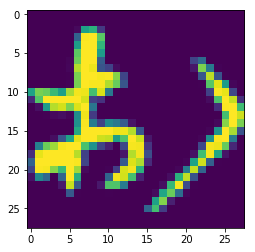

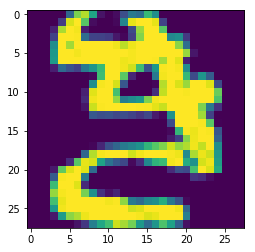

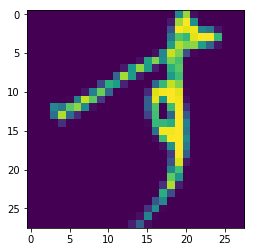

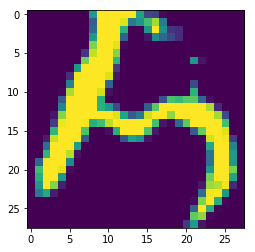

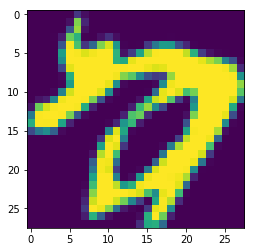

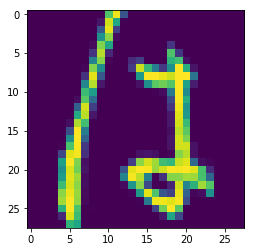

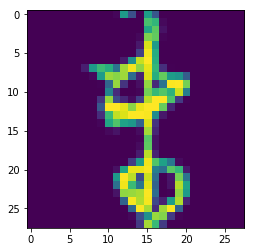

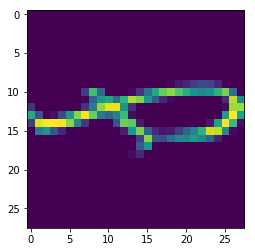

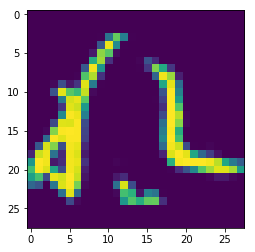

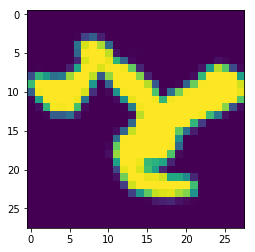

In [49]:
x_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) /255.0
x_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:]))) /255.0

x_train_all = []
y_train_all = []

x_test_all = []
y_test_all = []


for i in range(10):
    x_train_all.append(x_train[Y_train == i])
    y_train_all.append(y_train[Y_train == i])
    x_test_all.append(x_test[Y_test == i])
    y_test_all.append(y_test[Y_test == i])
    
simplest_index = [579, 274, 547, 824, 273, 760, 569, 86, 505, 610]
simplest_index = [396, 909, 471, 937, 799, 437, 645, 847, 772, 227]
for i in range(10):
    plt.imshow(X_train[Y_train == i][simplest_index[i]].reshape(28, 28))
    plt.show()

In [50]:
# training data for autoencoder..
x_train_easy = []
x_train_hard = []
x_test_easy = []
x_test_hard = []
x_tmptest_easy = []


num_classes = 10

# use only half of the output classes to train one autoencoder. 
# first half : range(int(num_classes/2))
# second half : range(int(num_classes/2), num_classes)

y_trndata_easy = []
y_trndata_hard = []
y_testdata_easy = []
y_testdata_hard = []

#for i in range(int(num_classes/2), num_classes):
for i in range(int(num_classes)):

    trn_easy = x_train_all[i][y_train_all[i][0]==0]
    trn_hard = x_train_all[i][y_train_all[i][0]>0]
    
    print(i, trn_easy.shape, trn_hard.shape)

    test_easy = x_test_all[i][y_test_all[i][0]==0]
    test_hard = x_test_all[i][y_test_all[i][0]>0]
    test_easy_tmp = x_test_all[i][y_test_all[i][0]==0]
    
    # there are more easy examples than hard examples
    n1 = trn_hard.shape[0]
    n2 = trn_easy.shape[0]
    #trn_easy = trn_easy[0:n1]
    #trn_hard = trn_hard[0:n1]
    
    while 3*n1 > n2:
        trn_easy = np.concatenate((trn_easy, trn_easy), axis=0)
        n2 = trn_easy.shape[0]
        
    trn_hard = np.concatenate((trn_hard[0:n1],  trn_easy[n1:n2]), axis=0)
    
    
    n3 = test_hard.shape[0]
    n4 = test_easy.shape[0]
    test_hard = np.concatenate((test_hard[0:n3], test_easy[n3:n4]), axis=0)
    #test_easy = test_easy[0:n2]
    #test_hard = test_hard[0:n2]
    #trn_easy = np.concatenate((trn_hard[0:n1], trn_easy), axis=0)
    
    for j in range(0,n2):
        #trn_easy[j] = trn_easy[-1] 
        trn_easy[j] = x_train_all[i][simplest_index[i]]
    #test_easy = np.concatenate((test_hard[0:n3], test_easy), axis=0)  
    
    for j in range(0,n4):
        test_easy[j] = trn_easy[-1]
        #test_easy[j] = x_train_all[i][simplest_index[i]]
    x_train_easy.append(trn_easy)
    x_train_hard.append(trn_hard)
    
    
    # testing data
    x_test_easy.append(test_easy)
    x_test_hard.append(test_hard)
    y_trndata_hard += [i for _ in (y_train_all[i][0]>0) if _ is True]
    y_testdata_easy += [i for _ in (y_test_all[i][0]==0) if _ is True]
    #y_testdata_easy = [i for _ in (y_test_all[i][0]>0) if _ is True] + y_testdata_easy

    #y_testdata_hard += [i for _ in (y_test_all[i][0]>0) if _ is True]

x_trndata_easy = np.concatenate(x_train_easy)
x_trndata_hard = np.concatenate(x_train_hard)
x_testdata_easy = np.concatenate(x_test_easy)
x_testdata_hard = np.concatenate(x_test_hard)

print (x_trndata_easy.shape, x_trndata_hard.shape, x_testdata_easy.shape, x_testdata_hard.shape, len(y_testdata_easy))

for i in range(5):
    print (i, x_train_easy[i].shape[0])
    print (i, x_train_hard[i].shape[0])


 

(0, (4904, 784), (1096, 784))
(1, (4703, 784), (1297, 784))
(2, (3819, 784), (2181, 784))
(3, (4894, 784), (1106, 784))
(4, (4321, 784), (1679, 784))
(5, (4973, 784), (1027, 784))
(6, (3731, 784), (2269, 784))
(7, (4845, 784), (1155, 784))
(8, (4873, 784), (1127, 784))
(9, (5151, 784), (849, 784))
((58085, 784), (58085, 784), (6308, 784), (6308, 784), 6308)
(0, 4904)
(0, 4904)
(1, 4703)
(1, 4703)
(2, 7638)
(2, 7638)
(3, 4894)
(3, 4894)
(4, 8642)
(4, 8642)


In [43]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda
import dill
import psutil
import time

def measure_performance_LeNet(X, Y):
    # load branchynet
    branchyNet = None
    with open("_models/lenet_k_mnist.bn", "rb") as f:
        branchyNet = dill.load(f)
    #set network to inference mode, this is fob_test_data_yr measuring baseline function. 
    branchyNet.testing()
    branchyNet.verbose = False

    #branchyNet.to_cpu()
    TEST_BATCHSIZE = 10    
    
    
    branchyNet.to_cpu()
    c_baseacc, c_basediff, _, _ = utils.test(branchyNet, X, Y, main=True, batchsize=TEST_BATCHSIZE)
    
    print("LeNet accuracy is ", c_baseacc)
    print("LeNet time is ", c_basediff)
    print("\n")
    return c_baseacc, c_basediff

def measure_performance_branchynet(X, Y,threshold=0):
    # load branchynet
    branchyNet = None
    with open("_models/lenet_k_mnist.bn", "rb") as f:
        branchyNet = dill.load(f)
    #set network to inference mode, this is fob_test_data_yr measuring baseline function. 
    branchyNet.testing()
    branchyNet.verbose = False

    #branchyNet.to_cpu()
    TEST_BATCHSIZE = 10    
    thresholds = [0.025+threshold]
    #print(decoded_imgs.shape)
    
    cpu_time_a = (time.time(), psutil.cpu_times())
    
    branchyNet.to_cpu()
    c_ts, c_accs, c_diffs, c_exits  = utils.screen_branchy(branchyNet, X, Y, thresholds,
                                                       batchsize=TEST_BATCHSIZE, verbose=False)
    c_diffs *= len(Y)

    print("accuracy is ", c_accs)
    print("branchyNet time is ", c_diffs)
    print("the distribution of exit number is ", c_exits)
    
    cpu_time_b = (time.time(), psutil.cpu_times())
    print 'CPU used in %d seconds: %s' % (
        cpu_time_b[0] - cpu_time_a[0],
        calculate(cpu_time_a[1], cpu_time_b[1])
    )
    print("\n")
    return c_accs, c_diffs
# show some easy data and hard data


def measure_perf_and_time(X_test_tmp, Y_test_tmp, data_tmp_shape, threshold=0.5):
    
    b_test_data_x = X_test_tmp.reshape(data_tmp_shape)/255.0
    

    cpu_time_a = (time.time(), psutil.cpu_times())
    
    start = time.time()
    decoded_imgs = autoencoder.predict(b_test_data_x)
    decoded_imgs *= 255.0

    end = time.time()
    
    cpu_time_b = (time.time(), psutil.cpu_times())
    print 'CPU used in %d seconds: %s' % (
        cpu_time_b[0] - cpu_time_a[0],
        calculate(cpu_time_a[1], cpu_time_b[1])
    )
    #np.savetxt('Kmnist_converted.txt',decoded_imgs)
    acc, c_diff = measure_performance_branchynet(decoded_imgs.reshape(-1, 1, 28,28), Y_test_tmp, threshold=threshold)

    print("total time(s) is ", end - start + c_diff)

    print("\n")
    return acc, end - start + c_diff




# show some easy data and hard data

def show_all(X_easy, X_hard, length = 100):
    n = 40
    for shift in range(0, length, 40):
        plt.figure(figsize=(20, 4))
        for i in range(1, n + 1):
            # Display original
            ax = plt.subplot(n/20, 20, i)
            plt.imshow(X_easy[shift+i-1].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
    
        plt.figure(figsize=(20, 4))
        for i in range(1, n + 1):
            # Display original
            ax = plt.subplot(n/20, 20, i)
            plt.imshow(X_hard[shift+i-1].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
        print("---------------------***********************************************--------------")
#Verify by branchynet


def calculate(t1, t2):
    # from psutil.cpu_percent()
    # see: https://github.com/giampaolo/psutil/blob/master/psutil/__init__.py
    t1_all = sum(t1)
    t1_busy = t1_all - t1.idle
    t2_all = sum(t2)
    t2_busy = t2_all - t2.idle
    if t2_busy <= t1_busy:
        return 0.0
    busy_delta = t2_busy - t1_busy
    all_delta = t2_all - t1_all
    busy_perc = (busy_delta / all_delta) * 100
    return round(busy_perc, 1)


In [20]:
# this experiment for simple autoencoder

In [51]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_ground,valid_ground = train_test_split(x_trndata_hard,
                                                              x_trndata_easy,
                                                              test_size=0.2,
                                                              random_state=13)
train_X, train_ground, valid_X, valid_ground = x_trndata_hard, x_trndata_easy, x_testdata_hard,  x_testdata_easy
print(train_X.shape, train_ground.shape, valid_X.shape, valid_ground.shape)

((58085, 784), (58085, 784), (6308, 784), (6308, 784))


In [52]:
#autoencoder 
from tensorflow.keras import regularizers



input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(512, activation='relu',activity_regularizer=regularizers.l1(10e-8))(input_img)
encoded = layers.Dense(384, activation='relu',activity_regularizer=regularizers.l1(10e-8))(encoded)
encoded = layers.Dense(256, activation='relu',activity_regularizer=regularizers.l1(10e-8))(encoded)
encoded = layers.Dense(64, activation='linear',activity_regularizer=regularizers.l1(10e-8))(encoded)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_X, train_ground,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(valid_X,valid_ground))

data_shape = (X_test.shape[0], 784)

Train on 58085 samples, validate on 6308 samples
Epoch 1/100
58085/58085 [==============================] - 5s 89us/sample - loss: 0.2549 - val_loss: 0.2291
Epoch 2/100
58085/58085 [==============================] - 4s 71us/sample - loss: 0.1379 - val_loss: 0.1950
Epoch 3/100
58085/58085 [==============================] - 4s 72us/sample - loss: 0.1225 - val_loss: 0.1812
Epoch 4/100
58085/58085 [==============================] - 4s 72us/sample - loss: 0.1145 - val_loss: 0.1885
Epoch 5/100
58085/58085 [==============================] - 4s 72us/sample - loss: 0.1103 - val_loss: 0.1854
Epoch 6/100
58085/58085 [==============================] - 4s 73us/sample - loss: 0.1073 - val_loss: 0.1856
Epoch 7/100
58085/58085 [==============================] - 4s 73us/sample - loss: 0.1057 - val_loss: 0.1951
Epoch 8/100
58085/58085 [==============================] - 4s 72us/sample - loss: 0.1050 - val_loss: 0.1932
Epoch 9/100
58085/58085 [==============================] - 4s 73us/sample - loss: 0.105

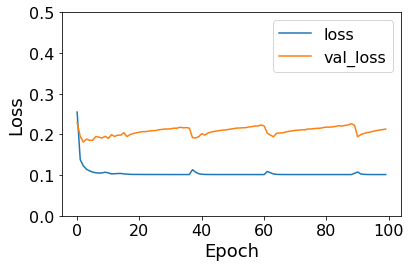

In [53]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes',edgecolor='black')

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Peng/peng/paper_figures/{}.pdf'.format('Autoencode-loss-kmnist')) 
plt.show()

In [38]:

# measure performance data, all data go into exit 0
b_test_data_x = X_test.reshape(data_shape)
decoded_imgs = autoencoder.predict(b_test_data_x)
#np.savetxt('Kminst_test_con.txt',decoded_imgs)
#con_test= np.loadtxt('Kminst_test_con.txt')
#test_check = con_test.reshape(10000,1,28,28)
#print(test_check.shape)

(10000, 1, 28, 28)


In [44]:
print(data_shape)
measure_perf_and_time(X_test, Y_test, data_shape)

# measure performance data,all data go into different exits
measure_perf_and_time(X_test, Y_test, data_shape, 2)

(10000, 784)
CPU used in 0 seconds: 24.1
('accuracy is ', array([0.9232]))
('branchyNet time is ', array([5.01052165]))
('the distribution of exit number is ', [array([9671,  329])])
CPU used in 19 seconds: 98.1


('total time(s) is ', array([5.73800969]))


CPU used in 0 seconds: 28.1
('accuracy is ', array([0.92289999]))
('branchyNet time is ', array([3.29109097]))
('the distribution of exit number is ', [array([10000,     0])])
CPU used in 17 seconds: 98.4


('total time(s) is ', array([3.99302816]))




(array([0.92289999]), array([3.99302816]))

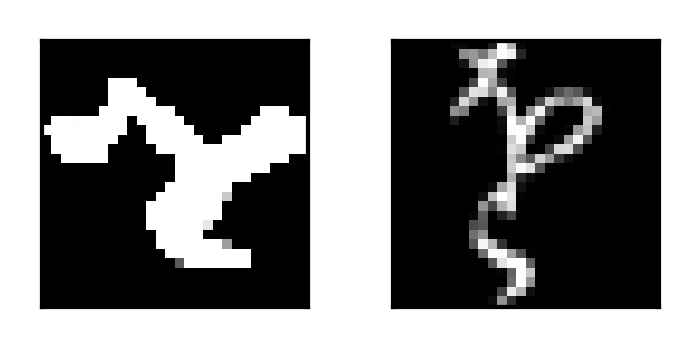

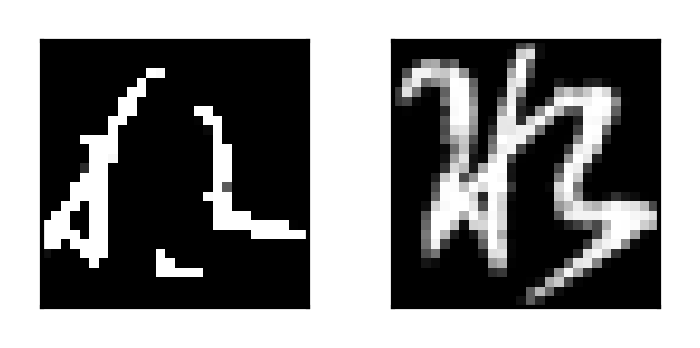

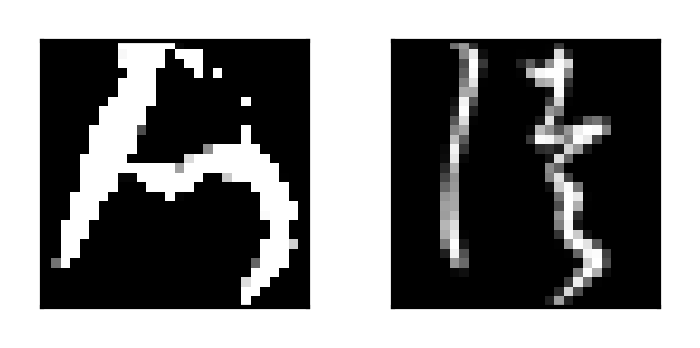

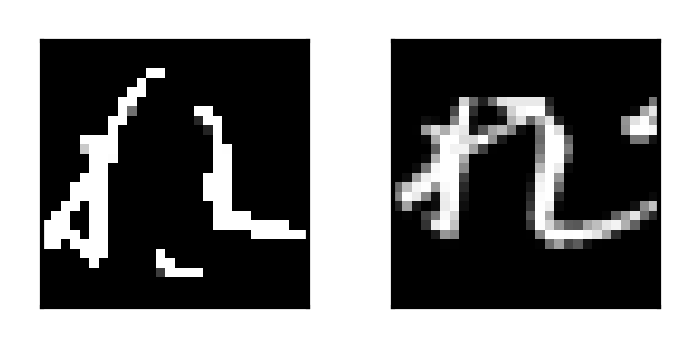

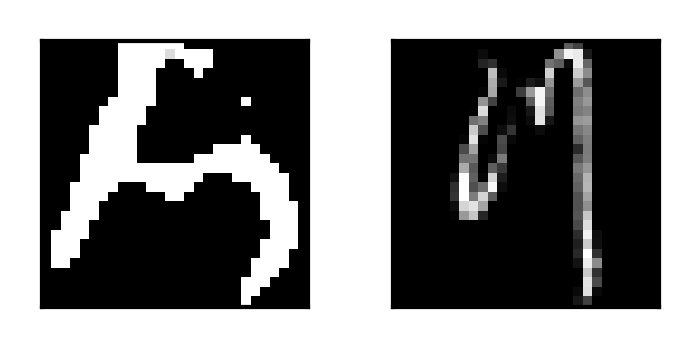

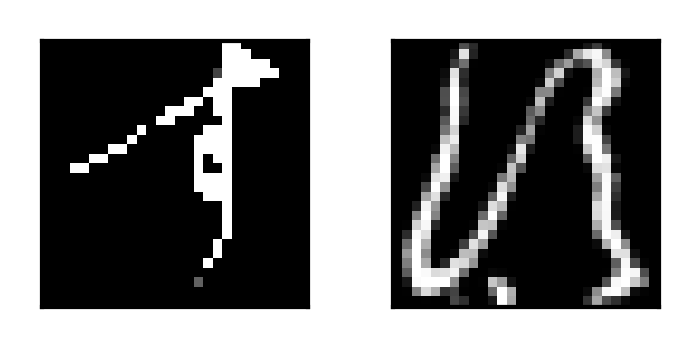

In [17]:

for i in range(10):
    if y_test_data[i] == 1:
        
        plt.figure(figsize=(2, 1), dpi=380)
        ax = plt.subplot(1, 2, 1)
        plt.imshow(decoded_imgs[i].reshape(28, 28))

        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(1, 2, 2)
        plt.imshow(X_test[i].reshape(28, 28))

        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)     
        
        
        plt.tight_layout()
        plt.show()
        

In [ ]:

    
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(512, activation='relu',activity_regularizer=regularizers.l1(10e-8))(input_img)
encoded = layers.Dense(384, activation='relu',activity_regularizer=regularizers.l1(10e-8))(encoded)
encoded = layers.Dense(256, activation='relu',activity_regularizer=regularizers.l1(10e-8))(encoded)
encoded = layers.Dense(64, activation='linear',activity_regularizer=regularizers.l1(10e-8))(encoded)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_X, train_ground,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(valid_X,valid_ground))
    

In [70]:
for i in range(10):
    print("**************current input number is ", i)
    X_test_tmp = X_test[Y_test==i]
    Y_test_tmp = Y_test[Y_test==i]

        data_tmp_shape = (X_test_tmp.shape[0], 784)

    measure_perf_and_time(X_test_tmp, Y_test_tmp, data_tmp_shape, 2)

('**************current input number is ', 0)
('accuracy is ', array([0.80299999]))
('the distribution of exit number is ', [array([1000,    0])])
('branchynet running time(s) is ', 1.6042778491973877)
('total time(s) is ', 1.738996982574463)
CPU used in 1 seconds: 95.3
('**************current input number is ', 1)
('accuracy is ', array([0.626]))
('the distribution of exit number is ', [array([1000,    0])])
('branchynet running time(s) is ', 1.4546191692352295)
('total time(s) is ', 1.6026389598846436)
CPU used in 1 seconds: 95.1
('**************current input number is ', 2)
('accuracy is ', array([0.759]))
('the distribution of exit number is ', [array([1000,    0])])
('branchynet running time(s) is ', 1.4206349849700928)
('total time(s) is ', 1.5498600006103516)
CPU used in 1 seconds: 96.9
('**************current input number is ', 3)
('accuracy is ', array([0.90399999]))
('the distribution of exit number is ', [array([1000,    0])])
('branchynet running time(s) is ', 1.50907087326

In [ ]:
('accuracy is ', array([0.9226]))
('the distribution of exit number is ', [array([7532, 2468])])
('branchynet running time(s) i ', 28.145965099334717)
('total time(s) is ', 29.104530811309814)
CPU used in 29 seconds: 96.0
('accuracy is ', array([0.92199999]))
('the distribution of exit number is ', [array([10000,     0])])
('branchynet running time(s) is ', 18.179352045059204)
('total time(s) is ', 18.97394895553589)
CPU used in 18 seconds: 95.2
    
('accuracy is ', array([0.92499999]))
('the distribution of exit number is ', [array([10000,     0])])
('branchynet running time(s) is ', 18.498135089874268)
('total time(s) is ', 19.237569093704224)
CPU used in 19 seconds: 95.4

In [ ]:

# the next experiment for convolutional NN

In [45]:
# measure performance data,all data go into different exits
measure_perf_and_time(X_test, Y_test, (-1, 784), 2)


CPU used in 0 seconds: 16.4
('accuracy is ', array([0.92499999]))
('branchyNet time is ', array([3.95138192]))
('the distribution of exit number is ', [array([10000,     0])])
CPU used in 19 seconds: 98.8


('total time(s) is ', array([4.83758998]))




array([0.92499999])

In [ ]:
for i in range(10):
    print("**************current input number is ", i)
    X_test_tmp = X_test[Y_test==i]
    Y_test_tmp = Y_test[Y_test==i]

    data_tmp_shape = (X_test_tmp.shape[0], 28, 28, 1)

    measure_perf_and_time(X_test_tmp, Y_test_tmp, data_tmp_shape)

In [ ]:
for i in range(10):
    print("**************current input number is ", i)
    X_test_tmp = X_test[Y_test==i]
    Y_test_tmp = Y_test[Y_test==i]

    data_tmp_shape = (X_test_tmp.shape[0], 28, 28, 1)

    measure_perf_and_time(X_test_tmp, Y_test_tmp, data_tmp_shape, 2)

In [46]:

# measure branchyNet
measure_performance_branchynet(X_test, Y_test)
# measure BranchyNet with early exit
measure_performance_branchynet(X_test, Y_test, 2)
# measure LeNet
measure_performance_LeNet(X_test, Y_test)
# measure performance data,all data go into different exits
measure_perf_and_time(X_test, Y_test, (-1, 784), 2)

('accuracy is ', array([0.9205]))
('branchyNet time is ', array([13.51258516]))
('the distribution of exit number is ', [array([6308, 3692])])
CPU used in 29 seconds: 98.8


('accuracy is ', array([0.87389999]))
('branchyNet time is ', array([3.50764632]))
('the distribution of exit number is ', [array([10000,     0])])
CPU used in 18 seconds: 98.8


('LeNet accuracy is ', 0.9139999926686287)
('LeNet time is ', 18.59014630317688)


CPU used in 0 seconds: 21.1
('accuracy is ', array([0.92499999]))
('branchyNet time is ', array([3.58754134]))
('the distribution of exit number is ', [array([10000,     0])])
CPU used in 19 seconds: 98.7


('total time(s) is ', array([4.36111736]))




array([0.92499999])

In [50]:
# scale analysis, use part of training data 
    
def scale_analysis(percentile=0.1):

    X_test_part = []
    Y_test_part = []


    for i in range(10):
        X_test_part.append(X_test[Y_test == i][0:int(1000*percentile), :])
        Y_test_part.append(Y_test[Y_test == i][0:int(1000*percentile)])
    
    X_test_part = np.concatenate(X_test_part)
    Y_test_part = np.concatenate(Y_test_part).reshape(-1, )

    return measure_perf_and_time(X_test_part, Y_test_part, (-1, 784), 2)
    
acc = []
run_time = []
for i in range(1, 11, 1):
    _acc, _time = scale_analysis(i/10.0)
    acc.append(_acc)
    run_time.append(_time)
print(list(map(lambda x: x[0], acc)))
print(list(map(lambda x: x[0], run_time)))

CPU used in 0 seconds: 21.8
('accuracy is ', array([0.92099999]))
('branchyNet time is ', array([0.41268969]))
('the distribution of exit number is ', [array([1000,    0])])
CPU used in 2 seconds: 98.8


('total time(s) is ', array([0.52258873]))


CPU used in 0 seconds: 56.9
('accuracy is ', array([0.92099999]))
('branchyNet time is ', array([0.81262112]))
('the distribution of exit number is ', [array([2000,    0])])
CPU used in 4 seconds: 99.2


('total time(s) is ', array([0.98759127]))


CPU used in 0 seconds: 46.2
('accuracy is ', array([0.92666666]))
('branchyNet time is ', array([1.16618729]))
('the distribution of exit number is ', [array([3000,    0])])
CPU used in 5 seconds: 99.0


('total time(s) is ', array([1.42730117]))


CPU used in 0 seconds: 38.3
('accuracy is ', array([0.92449999]))
('branchyNet time is ', array([1.4631114]))
('the distribution of exit number is ', [array([4000,    0])])
CPU used in 7 seconds: 98.8


('total time(s) is ', array([1.78609347]))


CPU u

In [47]:
# scale analysis, use part of training data 
    
def scale_analysis(percentile=0.1):

    X_test_part = []
    Y_test_part = []


    for i in range(10):
        X_test_part.append(X_test[Y_test == i][0:int(1000*percentile), :])
        Y_test_part.append(Y_test[Y_test == i][0:int(1000*percentile)])
    
    X_test_part = np.concatenate(X_test_part)
    Y_test_part = np.concatenate(Y_test_part).reshape(-1, )

    acc, diff = measure_performance_branchynet(X_test_part, Y_test_part)
    print("running time(s) is ", diff)
    return acc,  diff

acc = []
run_time = []
for i in range(1, 11, 1):
    _acc, _time = scale_analysis(i/10.0)
    acc.append(_acc)
    run_time.append(_time)
print(list(map(lambda x: x[0], acc)))
print(list(map(lambda x: x[0], run_time)))

('accuracy is ', array([0.922]))
('branchyNet time is ', array([1.64907861]))
('the distribution of exit number is ', [array([635, 365])])
CPU used in 3 seconds: 99.2


('running time(s) is ', array([1.64907861]))
('accuracy is ', array([0.922]))
('branchyNet time is ', array([2.51473546]))
('the distribution of exit number is ', [array([1248,  752])])
CPU used in 5 seconds: 98.3


('running time(s) is ', array([2.51473546]))
('accuracy is ', array([0.92066667]))
('branchyNet time is ', array([4.63913298]))
('the distribution of exit number is ', [array([1877, 1123])])
CPU used in 9 seconds: 99.1


('running time(s) is ', array([4.63913298]))
('accuracy is ', array([0.921]))
('branchyNet time is ', array([5.16554618]))
('the distribution of exit number is ', [array([2524, 1476])])
CPU used in 11 seconds: 98.7


('running time(s) is ', array([5.16554618]))
('accuracy is ', array([0.9204]))
('branchyNet time is ', array([6.56226373]))
('the distribution of exit number is ', [array([3165,

In [ ]:
# check model 5-9 for data 







In [ ]:
#combine more data 